In [1]:
import pandas as pd
import numpy as np
cash_balance = pd.read_csv(r'/Users/stanislasbocearov/Desktop/home-credit-default-risk/POS_CASH_balance.csv')
bureau_balance = pd.read_csv(r'/Users/stanislasbocearov/Desktop/home-credit-default-risk/bureau_balance.csv')
credit_balance = pd.read_csv(r'/Users/stanislasbocearov/Desktop/home-credit-default-risk/credit_card_balance.csv')
app_test = pd.read_csv(r'/Users/stanislasbocearov/Desktop/home-credit-default-risk/application_test.csv')
installments_payments = pd.read_csv(r'/Users/stanislasbocearov/Desktop/home-credit-default-risk/installments_payments.csv')
app_train = pd.read_csv(r'/Users/stanislasbocearov/Desktop/home-credit-default-risk/application_train.csv')
previous_app = pd.read_csv(r'/Users/stanislasbocearov/Desktop/home-credit-default-risk/previous_application.csv')
bureau = pd.read_csv(r'/Users/stanislasbocearov/Desktop/home-credit-default-risk/bureau.csv')
sample_submission = pd.read_csv(r'/Users/stanislasbocearov/Desktop/home-credit-default-risk/sample_submission.csv')

# Cash Balance Dataset

In [2]:
cash_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [3]:
cash_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [4]:
cash_balance.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.606657e+01    1.199506e+01   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434405e+06  1.895500e+05   -5.400000e+01    1.000000e+01   
50%    1.896565e+06  2.786540e+05   -2.800000e+01    1.200000e+01   
75%    2.368963e+06  3.674290e+05   -1.300000e+01    2.400000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    9.200000e+01   

       CNT_INSTALMENT_FUTURE        SK_DPD    SK_DPD_DEF  
count           9.975271e+06  1.000136e+07  1.000136e+07  
mean            1.048384e+01  1.160693e+01  6.544684e-01  
std             1.110906e+01  1.327140e+02  3.276249e+01  
min             0.000000e+00  0.000000e+00  0.000000e+00  
25%             3.000000e+00  0.000000e+00  0.000000e+00  
50%             7.000000e+00  0.000000e+00  0.000000e+00  
75%             1.400000e+01  0.000000e+00  0.000000e+00  
max             8.500000e+01  4.231000e+03  3.595000e+03

In [5]:
cash_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [6]:
cash_balance.nunique()

SK_ID_PREV               936325
SK_ID_CURR               337252
MONTHS_BALANCE               96
CNT_INSTALMENT               73
CNT_INSTALMENT_FUTURE        79
NAME_CONTRACT_STATUS          9
SK_DPD                     3400
SK_DPD_DEF                 2307
dtype: int64

Text(0, 0.5, 'Status of the contract')

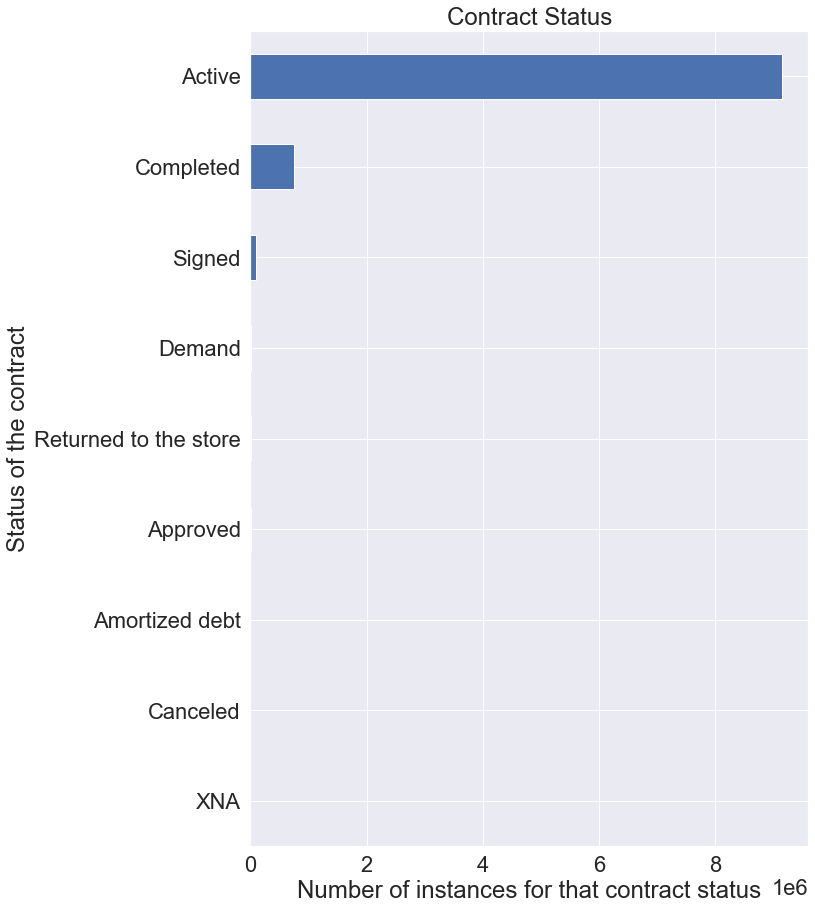

In [7]:
#only interested in active?
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
cash_balance['NAME_CONTRACT_STATUS'].value_counts().sort_values().plot(kind='barh', figsize=[10,15], title = 'Contract Status')
plt.xlabel("Number of instances for that contract status")
plt.ylabel("Status of the contract")

In [8]:
cash_balance["MONTHS_BALANCE"].max()

-1

In [9]:
cash_balance["MONTHS_BALANCE"].min()

-96

Text(0, 0.5, 'amount of counts instalments')

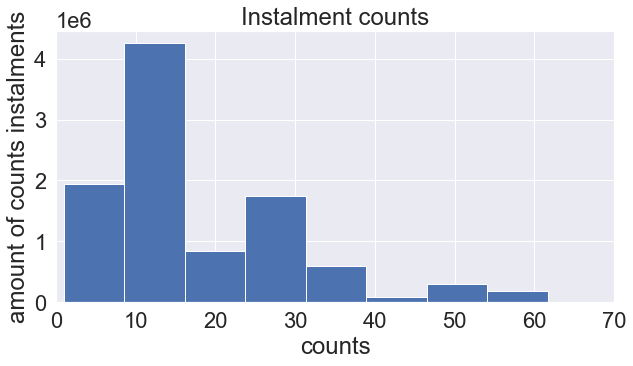

In [10]:
cash_balance["CNT_INSTALMENT"].hist(bins=12, figsize=(10, 5))
plt.xlim([0, 70])
plt.title("Instalment counts")
plt.xlabel('counts')
plt.ylabel('amount of counts instalments')

In [11]:
np.any(cash_balance['SK_ID_PREV'].duplicated())

True

In [12]:
np.any(cash_balance['SK_ID_CURR'].duplicated())

True

# Bureau balance dataset

In [13]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [14]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [15]:
bureau_balance.describe()

SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

In [16]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [17]:
np.any(bureau_balance['SK_ID_BUREAU'].duplicated())

True

Text(0, 0.5, 'amount of months')

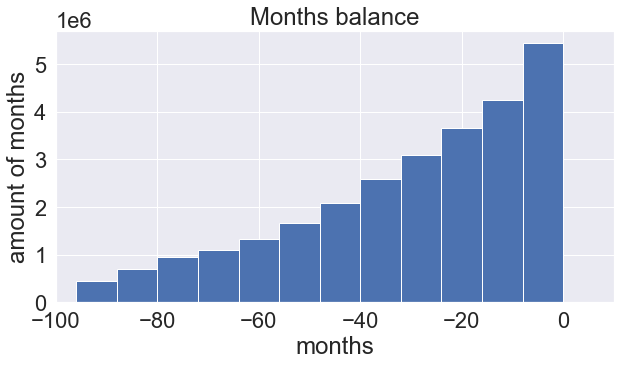

In [18]:
bureau_balance["MONTHS_BALANCE"].hist(bins=12, figsize=(10, 5))
plt.xlim([-100, 10])
plt.title("Months balance")
plt.xlabel('months')
plt.ylabel('amount of months')

'Status of Credit Bureau loan during the month (active, closed, DPD0-30,�\n[C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between \n1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )'

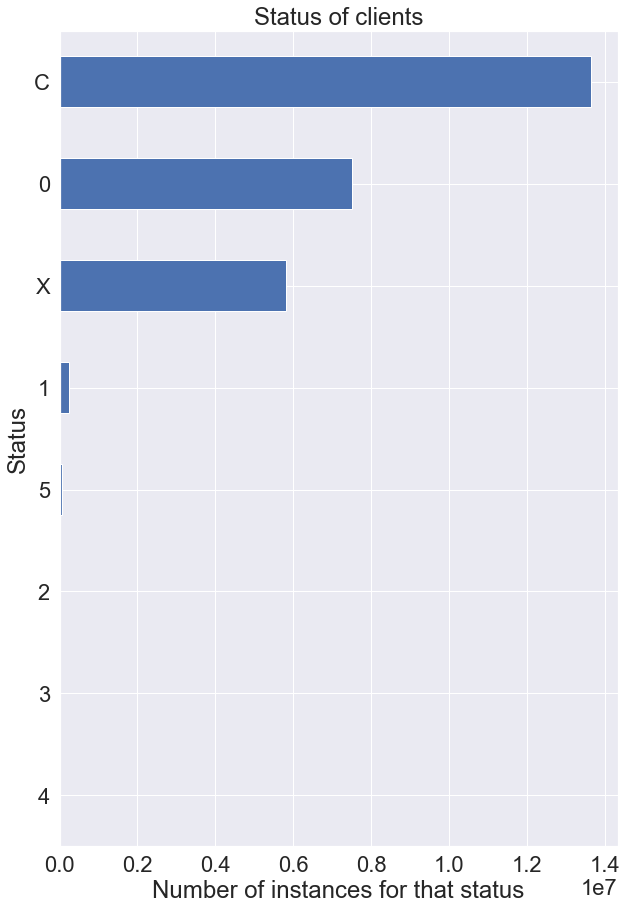

In [19]:
bureau_balance['STATUS'].value_counts().sort_values().plot(kind='barh', figsize=[10,15], title = 'Status of clients')
plt.xlabel("Number of instances for that status")
plt.ylabel("Status")
'''Status of Credit Bureau loan during the month (active, closed, DPD0-30,�
[C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 
1-30, 2 means DPD 31-60,� 5 means DPD 120+ or sold or written off ] )'''

# Credit balance dataset

In [20]:
credit_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

(0.0, 1000000.0)

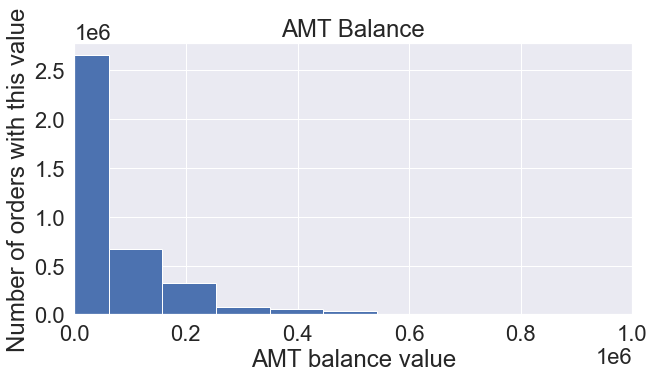

In [21]:
credit_balance["AMT_BALANCE"].hist(bins=20, figsize=(10, 5))
plt.title("AMT Balance")
plt.xlabel("AMT balance value")
plt.ylabel("Number of orders with this value")
plt.xlim([0, 1000000])

(0.0, 1000000.0)

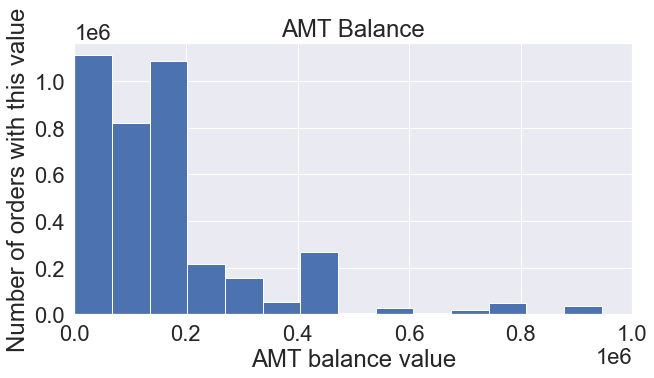

In [22]:
credit_balance["AMT_CREDIT_LIMIT_ACTUAL"].hist(bins=20, figsize=(10, 5))
plt.title("AMT Balance")
plt.xlabel("AMT balance value")
plt.ylabel("Number of orders with this value")
plt.xlim([0, 1000000])

(0.0, 500000.0)

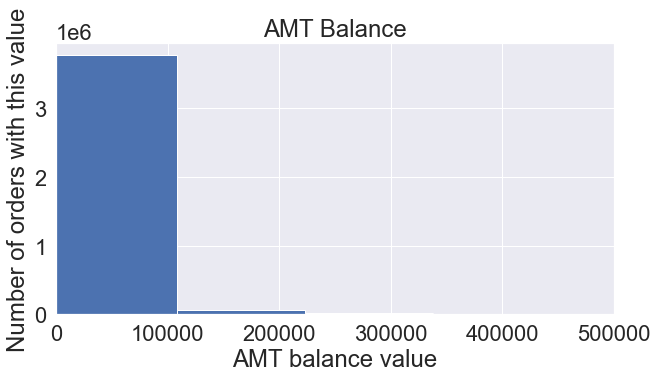

In [23]:
credit_balance["AMT_DRAWINGS_CURRENT"].hist(bins=20, figsize=(10, 5))
plt.title("AMT Balance")
plt.xlabel("AMT balance value")
plt.ylabel("Number of orders with this value")
plt.xlim([0, 500000])

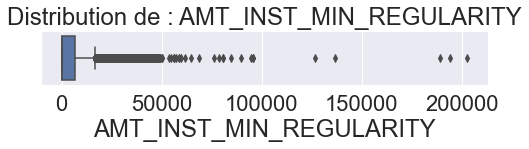

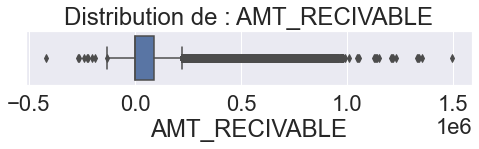

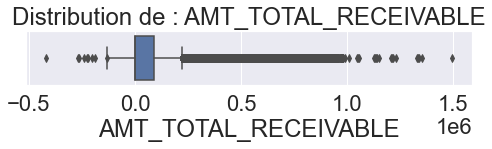

In [24]:
var_to_hist = ['AMT_INST_MIN_REGULARITY', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE']
for column in var_to_hist:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=credit_balance[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

Text(0, 0.5, 'Status')

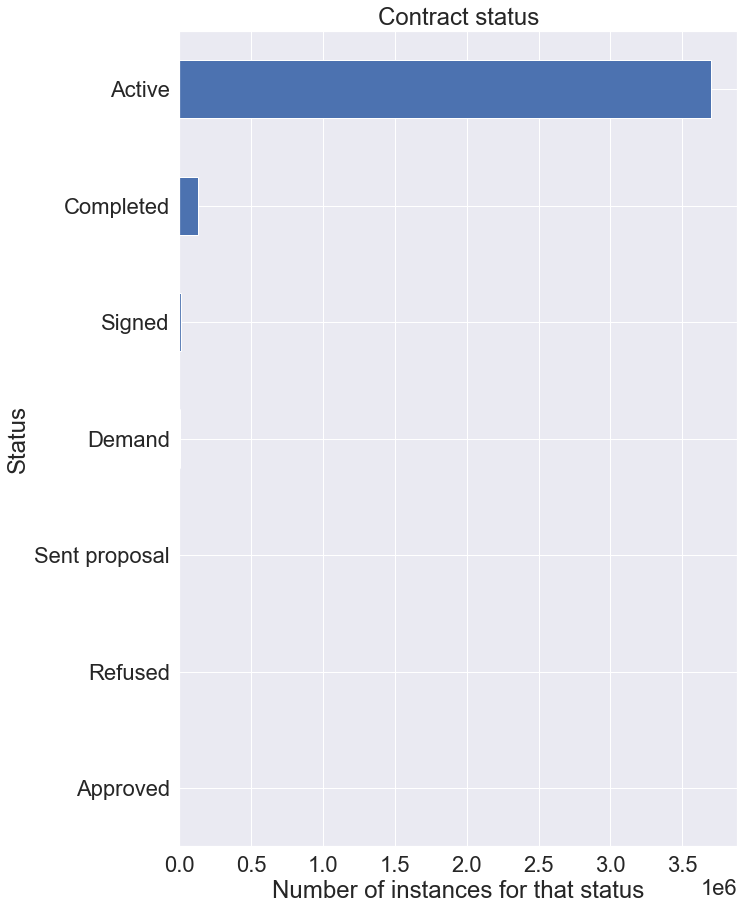

In [25]:
credit_balance['NAME_CONTRACT_STATUS'].value_counts().sort_values().plot(kind='barh', figsize=[10,15], title = 'Contract status')
plt.xlabel("Number of instances for that status")
plt.ylabel("Status")

In [26]:
credit_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

# App test dataset


In [27]:
app_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

# Installments_payments

In [28]:
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

(0.0, 150.0)

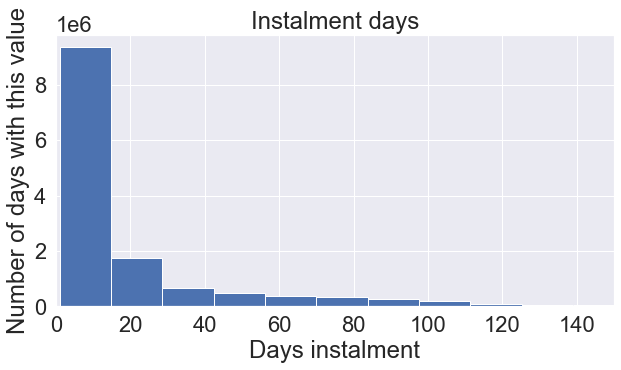

In [29]:
installments_payments['NUM_INSTALMENT_NUMBER'].hist(bins=20, figsize=(10, 5))
plt.title("Instalment days")
plt.xlabel("Days instalment")
plt.ylabel("Number of days with this value")
plt.xlim([0, 150])

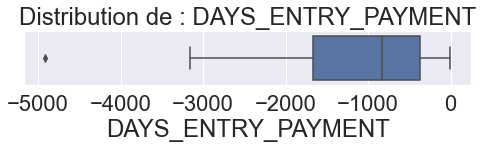

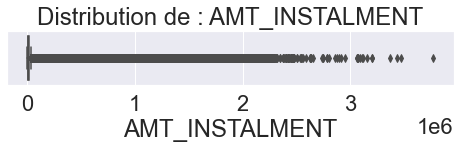

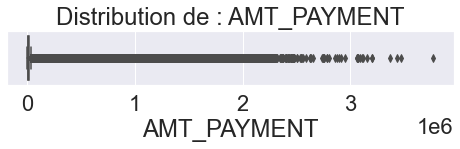

In [30]:
var_to_hist = ['DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']
for column in var_to_hist:
    plt.figure(figsize = (8,1))
    
    sns.boxplot(x=installments_payments[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

In [31]:
installments_payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

# App_train dataset

In [32]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [33]:
app_train['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

# Previous_app dataset

In [34]:
previous_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

# Bureau dataset

In [35]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [36]:
bureau['CREDIT_ACTIVE']

0          Closed
1          Active
2          Active
3          Active
4          Active
            ...  
1716423    Active
1716424    Closed
1716425    Closed
1716426    Closed
1716427    Closed
Name: CREDIT_ACTIVE, Length: 1716428, dtype: object

In [37]:
bureau['CREDIT_ACTIVE'].nunique()

4

Text(0, 0.5, 'Status')

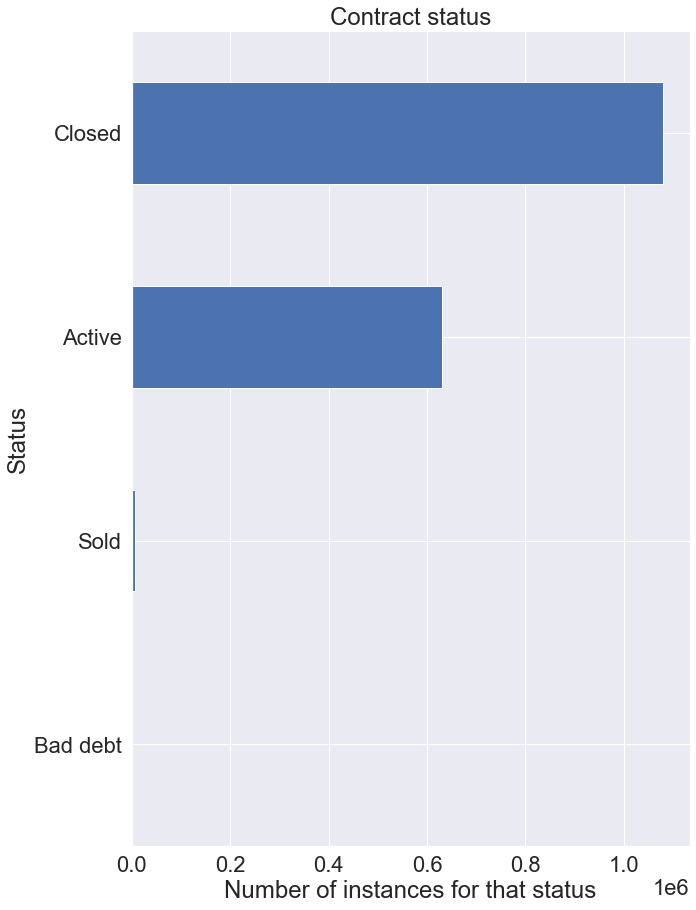

In [38]:
bureau['CREDIT_ACTIVE'].value_counts().sort_values().plot(kind='barh', figsize=[10,15], title = 'Contract status')
plt.xlabel("Number of instances for that status")
plt.ylabel("Status")

Text(0, 0.5, 'Status')

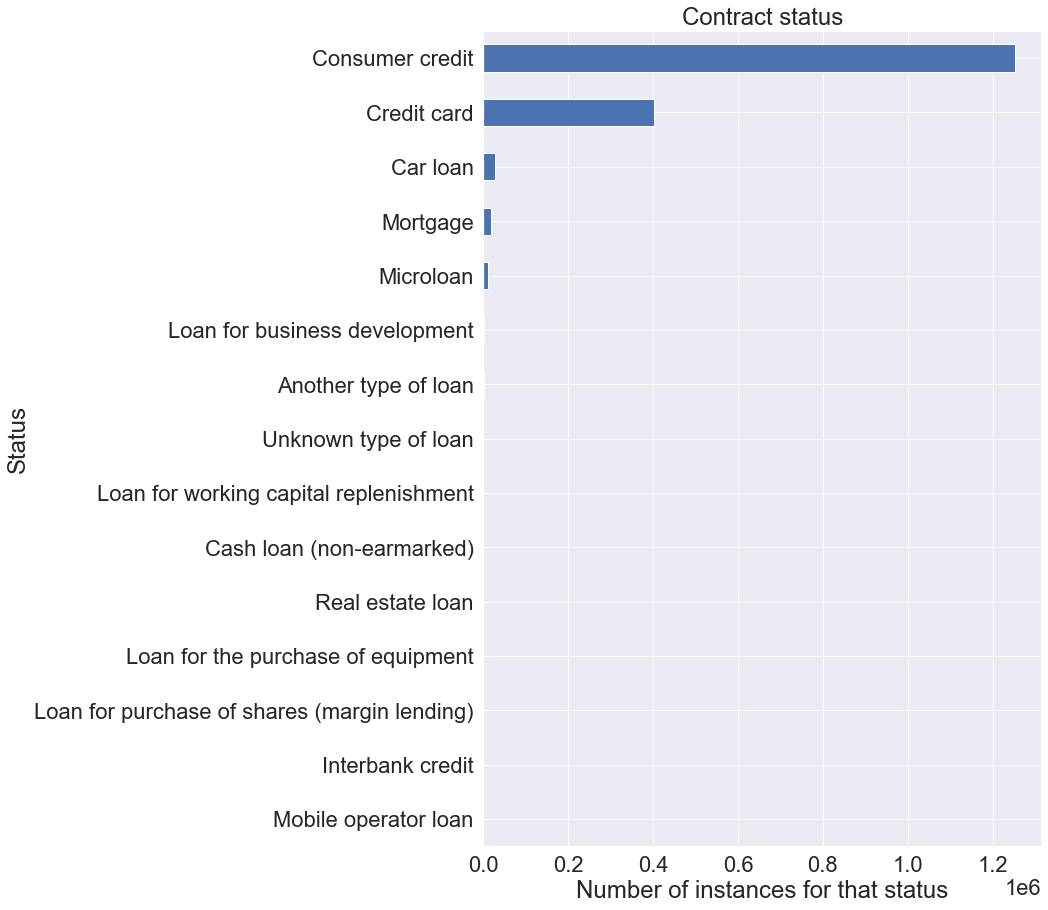

In [39]:
bureau['CREDIT_TYPE'].value_counts().sort_values().plot(kind='barh', figsize=[10,15], title = 'Contract status')
plt.xlabel("Number of instances for that status")
plt.ylabel("Status")

Text(0, 0.5, 'Status')

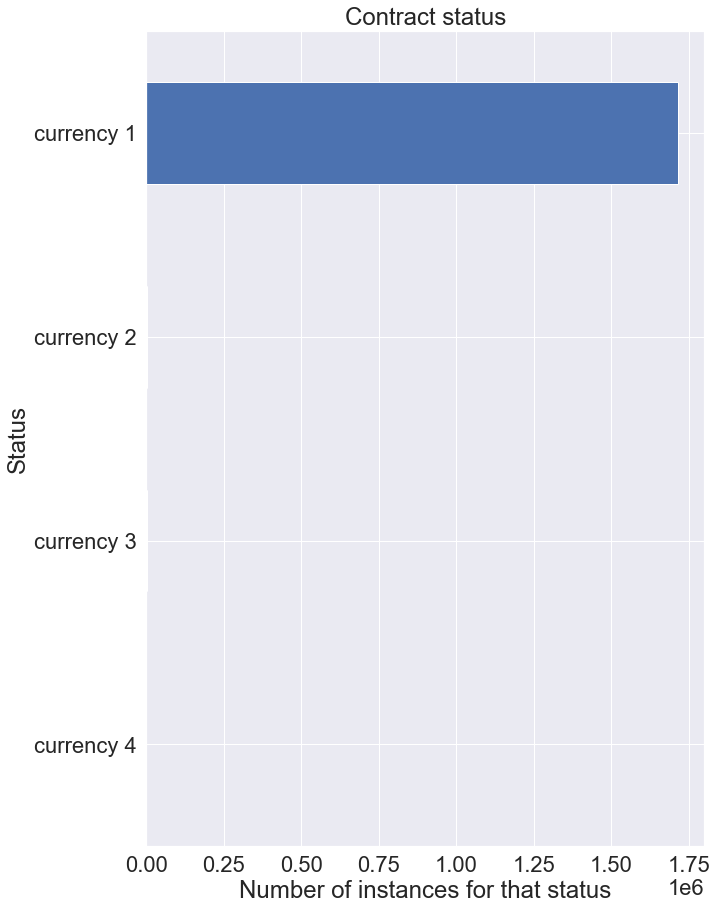

In [40]:
bureau['CREDIT_CURRENCY'].value_counts().sort_values().plot(kind='barh', figsize=[10,15], title = 'Contract status')
plt.xlabel("Number of instances for that status")
plt.ylabel("Status")

In [41]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

# Sample_submission dataset

In [42]:
sample_submission.head()

SK_ID_CURR  TARGET
0      100001     0.5
1      100005     0.5
2      100013     0.5
3      100028     0.5
4      100038     0.5

In [43]:
sample_submission['TARGET'].nunique()

1

In [44]:
sample_submission.isnull().sum()

SK_ID_CURR    0
TARGET        0
dtype: int64

# Cleaning

In [45]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [46]:
app_train.shape

(307511, 122)

In [47]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
app_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### For our baseline model, we will be using all features that we think could be useful for this project without thinking of ethic 

In [49]:
#document, extsource
columns_to_keep = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 
                   'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                   'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
                   'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 
                   'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 
                   'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'TARGET', 'EXT_SOURCE_2', 
                   'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
                   'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 
                   'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
                   'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
                   'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR', 
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 
                   'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',]

In [50]:
df = app_train[columns_to_keep]

In [51]:
print(app_train.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [52]:
df.shape

(307511, 56)

In [53]:
df.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
TARGET                             0
EXT_SOURCE_2                     660
FLAG_DOCUMENT_2                    0
F

In [54]:
df = df.dropna()

In [55]:
df.shape

(181720, 56)

In [56]:
df.isnull().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
TARGET                         0
EXT_SOURCE_2                   0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUM

In [57]:
df['TARGET'].value_counts()

0    166428
1     15292
Name: TARGET, dtype: int64

In [58]:
y_client_difficulties = df[df['TARGET'] == 1].index

In [59]:
y_good_client = df[df['TARGET'] == 0].index

In [60]:
y_good_client

Int64Index([     1,      2,      4,      5,      6,      7,     10,     12,
                13,     15,
            ...
            307494, 307495, 307496, 307497, 307498, 307499, 307502, 307503,
            307508, 307510],
           dtype='int64', length=166428)

In [61]:
df_resampled = pd.concat((df.loc[y_good_client].sample(15292, random_state=42), df.loc[y_client_difficulties].sample(15292)), axis=0)

In [62]:
df_resampled.shape

(30584, 56)

In [63]:
y = df_resampled['TARGET']

In [64]:
df_resampled = df_resampled.drop(['TARGET'], axis = 1)

In [65]:
pd.set_option('display.max_rows', df_resampled.shape[0])
df_resampled.describe().T

count           mean            std  \
CNT_CHILDREN                 30584.0       0.519945       0.782159   
AMT_INCOME_TOTAL             30584.0  177194.537032  674891.181575   
AMT_CREDIT                   30584.0  598013.184279  384391.960597   
AMT_ANNUITY                  30584.0   27648.075628   13742.699315   
AMT_GOODS_PRICE              30584.0  531097.458312  350790.657192   
REGION_POPULATION_RELATIVE   30584.0       0.020019       0.012763   
DAYS_BIRTH                   30584.0  -14511.606853    3563.319811   
DAYS_EMPLOYED                30584.0   -2155.468807    2160.687377   
DAYS_REGISTRATION            30584.0   -4459.512392    3189.707224   
DAYS_ID_PUBLISH              30584.0   -2785.270239    1498.599182   
FLAG_MOBIL                   30584.0       1.000000       0.000000   
FLAG_EMAIL                   30584.0       0.060980       0.239297   
REGION_RATING_CLIENT         30584.0       2.094919       0.506810   
REGION_RATING_CLIENT_W_CITY  30584.0       2.074974       0.500958   
EXT_SOURCE_2                 30584.0       0.472376       0.206150   
FLAG_DOCUMENT_2              30584.0       0.000000       0.000000   
FLAG_DOCUMENT_3              30584.0       0.795579       0.403284   
FLAG_DOCUMENT_4              30584.0       0.000033       0.005718   
FLAG_DOCUMENT_5              30584.0       0.015793       0.124674   
FLAG_DOCUMENT_6              30584.0       0.006539       0.080603   
FLAG_DOCUMENT_7              30584.0       0.000196       0.014005   
FLAG_DOCUMENT_8              30584.0       0.094886       0.293063   
FLAG_DOCUMENT_9              30584.0       0.003531       0.059320   
FLAG_DOCUMENT_10             30584.0       0.000000       0.000000   
FLAG_DOCUMENT_11             30584.0       0.003074       0.055355   
FLAG_DOCUMENT_12             30584.0       0.000000       0.000000   
FLAG_DOCUMENT_13             30584.0       0.002943       0.054168   
FLAG_DOCUMENT_14             30584.0       0.002779       0.052646   
FLAG_DOCUMENT_15             30584.0       0.001112       0.033324   
FLAG_DOCUMENT_16             30584.0       0.010626       0.102537   
FLAG_DOCUMENT_17             30584.0       0.000000       0.000000   
FLAG_DOCUMENT_18             30584.0       0.008501       0.091811   
FLAG_DOCUMENT_19             30584.0       0.000654       0.025564   
FLAG_DOCUMENT_20             30584.0       0.000817       0.028579   
FLAG_DOCUMENT_21             30584.0       0.000458       0.021391   
AMT_REQ_CREDIT_BUREAU_HOUR   30584.0       0.006834       0.087017   
AMT_REQ_CREDIT_BUREAU_DAY    30584.0       0.007389       0.114697   
AMT_REQ_CREDIT_BUREAU_WEEK   30584.0       0.034462       0.200519   
AMT_REQ_CREDIT_BUREAU_MON    30584.0       0.260855       0.851435   
AMT_REQ_CREDIT_BUREAU_QRT    30584.0       0.258403       0.623438   
AMT_REQ_CREDIT_BUREAU_YEAR   30584.0       1.934704       1.860349   
OBS_30_CNT_SOCIAL_CIRCLE     30584.0       1.474300       2.376435   
DEF_30_CNT_SOCIAL_CIRCLE     30584.0       0.158907       0.470137   
OBS_60_CNT_SOCIAL_CIRCLE     30584.0       1.455728       2.353139   
DEF_60_CNT_SOCIAL_CIRCLE     30584.0       0.110875       0.383547   

                                      min            25%            50%  \
CNT_CHILDREN                     0.000000       0.000000       0.000000   
AMT_INCOME_TOTAL             27000.000000  112500.000000  157500.000000   
AMT_CREDIT                   45000.000000  288873.000000  521280.000000   
AMT_ANNUITY                   3114.000000   17775.000000   26064.000000   
AMT_GOODS_PRICE              40500.000000  252000.000000  450000.000000   
REGION_POPULATION_RELATIVE       0.000533       0.009657       0.018801   
DAYS_BIRTH                  -25101.000000  -17174.000000  -14222.000000   
DAYS_EMPLOYED               -17139.000000   -2861.000000   -1467.000000   
DAYS_REGISTRATION           -22928.000000   -6666.250000   -4106.000000   
DAYS_ID_PUBLISH              -6256.000000   -4146.000000   -

In [66]:
df_is_categorical = df_resampled.dtypes==object

In [67]:
df_categorical = df_resampled.columns[df_is_categorical].tolist()

In [68]:
df_categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE']

In [69]:
df_cat = df_resampled[df_categorical]

In [70]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)

In [71]:
df_1hot = cat_encoder.fit_transform(df_cat)

In [72]:
df_resampled.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR'

In [73]:
len(df_categorical)

10

In [74]:
len([i for i in df_resampled.columns if i not in df_categorical])

45

In [75]:
df_numerical = [i for i in df_resampled.columns if i not in df_categorical]

In [76]:
df_numerical

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL

In [77]:
df_num = df_resampled[df_numerical]

In [78]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

In [79]:
df_prepared = np.hstack([df_scaled, df_1hot])

In [80]:
df_prepared.shape

(30584, 147)

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=98)
pca.fit(df_prepared)
print(pca.explained_variance_ratio_.cumsum())

[0.07089967 0.12625452 0.1768071  0.21746695 0.25216161 0.28281356
 0.31256002 0.34007331 0.36567184 0.39085538 0.41443769 0.43738702
 0.46027225 0.48299894 0.50550304 0.52792345 0.55026393 0.57254392
 0.59478608 0.61690968 0.63898697 0.66092392 0.68253623 0.70413593
 0.72527017 0.74595242 0.76605289 0.78517998 0.80357121 0.82106967
 0.83815092 0.85305823 0.86738807 0.88108725 0.89368693 0.90328651
 0.91193718 0.91988107 0.92724464 0.93389118 0.93986953 0.94572016
 0.95071794 0.95488761 0.95853898 0.96163998 0.96465423 0.96739046
 0.96955399 0.97167402 0.97356837 0.97535574 0.97693866 0.97824729
 0.97944773 0.98061055 0.98171113 0.98274871 0.98374692 0.98471102
 0.98553645 0.98632953 0.98708939 0.98779191 0.98847705 0.98913275
 0.98973282 0.99030918 0.99084889 0.99137398 0.99186958 0.99234173
 0.99280311 0.99320588 0.99355556 0.99389    0.99420257 0.99451138
 0.99480969 0.99510377 0.995369   0.99563037 0.9958733  0.99609877
 0.99631506 0.99652966 0.99674183 0.99694946 0.99714917 0.9973

In [82]:
#to keep 90 percent of variance
pca_2 = PCA(n_components=36)
df_reduced = pca_2.fit_transform(df_prepared)
print(pca_2.explained_variance_ratio_.cumsum())
df_reduced.shape

[0.07089967 0.12625452 0.1768071  0.21746695 0.25216161 0.28281356
 0.31256002 0.34007331 0.36567184 0.39085538 0.41443769 0.43738702
 0.46027225 0.48299893 0.50550303 0.52792345 0.55026392 0.57254391
 0.59478607 0.61690967 0.63898695 0.6609239  0.68253621 0.70413592
 0.72527016 0.7459524  0.76605287 0.78517995 0.80357118 0.82106963
 0.83815088 0.8530582  0.86738803 0.88108721 0.89368665 0.90328603]


(30584, 36)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df_reduced, y, test_size=0.2, random_state=42)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Xgboost

In [85]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [86]:
'''train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)'''

'train = xgb.DMatrix(X_train, label=y_train)\ntest = xgb.DMatrix(X_test, label=y_test)'

In [87]:
n_estimators = [int(x) for x in np.linspace(start = 250, stop = 750, num = 10)]
max_depth = [int(x) for x in np.linspace(50, 100, num = 10)]

parameters = {'eta' : [0.2, 0.25, 0.3],
              'max_depth': max_depth,
              'n_estimators': n_estimators,
              }

In [88]:
y_train_xgb = y_train.values

In [89]:
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier(use_label_encoder=False)

xgb_randomized = RandomizedSearchCV(estimator = xgb_model, param_distributions =parameters, n_iter = 30, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')

%time xgb_randomized.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[11:05:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.59267	validation_1-logloss:0.68967
[11:05:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.59267	validation_1-logloss:0.68967
[11:05:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.60618	validation_1-logloss:0.685

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           use_label_encoder=False,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'eta': [0.2, 0.25, 0.3],
                                        'max_depth': [50, 55, 61, 66, 72, 77,
                                                      83, 88, 94, 100],
                                        'n_estimators': [250, 305, 361, 416,
                                                         472, 527, 583, 638,
                                                         694, 750]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [90]:
best_xgb = xgb_randomized.best_estimator_
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.200000003,
              max_delta_step=0, max_depth=72, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=361, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [91]:
y_pred_xgb = best_xgb.predict(X_test)

In [92]:
y_pred_xgb

array([1, 0, 1, ..., 1, 1, 1])

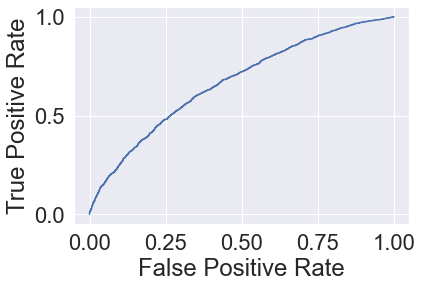

In [93]:
# Xgboost ROC Curve
from sklearn import metrics

y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thr_xgb = metrics.roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_xgb,tpr_xgb)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
metrics.roc_auc_score(y_test, y_pred_proba_xgb)

0.6686830881349459

In [95]:
g_mean_xgb = []
for tp, fp, th in zip(fpr_xgb[1:], tpr_xgb[1:], thr_xgb[1:]):
    g_mean = np.sqrt(tp*(1-fp))
    g_mean_xgb.append((th, g_mean))

Text(0, 0.5, 'gmean_xgb')

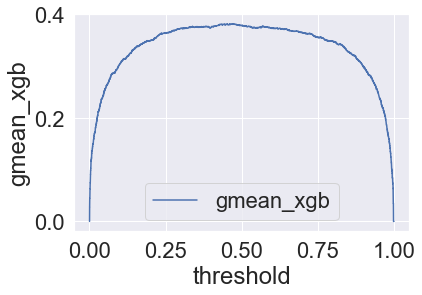

In [96]:
g_mean_xgb = pd.DataFrame(g_mean_xgb, columns=["threshold", "gmean_xgb"])
g_mean_xgb.plot(x='threshold', y='gmean_xgb')
plt.xlabel("threshold")
plt.ylabel("gmean_xgb")

In [97]:
best_xgb_threshold = g_mean_xgb.loc[g_mean_xgb["gmean_xgb"].argmax(), 'threshold']

In [98]:
y_pred_proba_xgb

array([0.9861281 , 0.01916987, 0.8978697 , ..., 0.8153165 , 0.9179486 ,
       0.68615204], dtype=float32)

In [99]:
y_pred_xgb

array([1, 0, 1, ..., 1, 1, 1])

In [100]:
best_xgb_threshold

0.47320867

In [101]:
y_pred_xgb_boolean = y_pred_proba_xgb > best_xgb_threshold

In [102]:
y_pred_xgb_boolean

array([ True, False,  True, ...,  True,  True,  True])

<AxesSubplot:>

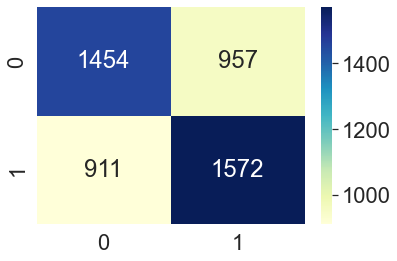

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=2)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_boolean), cmap="YlGnBu", annot=True, fmt="d")

In [104]:
'''Petar Todorov à Tout le monde (15:37)
Index(['PAYMENT_PROBLEMS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
numériques
Petar Todorov à Tout le monde (15:39)
NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               5
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     3
ORGANIZATION_TYPE             57
dtype: int64
Petar Todorov à Tout le monde (15:39)
catégorielles'''

"Petar Todorov à Tout le monde (15:37)\nIndex(['PAYMENT_PROBLEMS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',\n       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',\n       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',\n       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',\n       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',\n       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',\n       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',\n       'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY', 'EXT_SOURCE_2',\n       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',\n       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],\nnumériques\nPetar Todorov à Tout le monde (15:39)\nNAME_CONTRACT_TYPE             2\nCODE_GENDER                    2\nFLAG_OWN_REALTY                2\nNAME_TYPE_SUITE                7\nNAME_INCOME_TYPE               5\nNAME_EDUCATION_TYPE            5\nNAME_FAMILY_STATUS             5\nN

### Now, we will do the same but this time we will choose the columns with an ethic approach to obtain the best results 

In [105]:
#No gender/age, no owning car/house/education, no rating location
columns_to_keep = ['NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 
                'DAYS_EMPLOYED', 'FLAG_MOBIL','FLAG_EMAIL', 'OCCUPATION_TYPE','ORGANIZATION_TYPE', 'TARGET']

In [106]:
df_ethic = app_train[columns_to_keep]

In [107]:
df_ethic = df_ethic.dropna()

In [108]:
df_ethic.shape

(211108, 10)

In [109]:
df_ethic['TARGET'].value_counts()

0    192561
1     18547
Name: TARGET, dtype: int64

In [110]:
y_client_difficulties = df_ethic[df_ethic['TARGET'] == 1].index

In [111]:
y_good_client = df_ethic[df_ethic['TARGET'] == 0].index

In [113]:
df_ethic_res = pd.concat((df_ethic.loc[y_good_client].sample(5000, random_state=42), df_ethic.loc[y_client_difficulties].sample(5000)), axis=0)

In [114]:
y_eth = df_ethic_res['TARGET']

In [115]:
df_ethic_res = df_ethic_res.drop(['TARGET'], axis = 1)

In [116]:
df_ethic_is_categorical = df_ethic_res.dtypes==object

In [117]:
df_eth_categorical = df_ethic_res.columns[df_ethic_is_categorical].tolist()

In [118]:
df_eth_cat = df_ethic_res[df_eth_categorical]

In [119]:
df_eth_1hot = cat_encoder.fit_transform(df_eth_cat)

In [120]:
df_eth_numerical = [i for i in df_ethic_res.columns if i not in df_eth_categorical]

In [121]:
df_eth_num = df_ethic_res[df_eth_numerical]

In [122]:
df_eth_scaled = scaler.fit_transform(df_eth_num)

In [123]:
df_eth_prepared = np.hstack([df_eth_scaled, df_eth_1hot])

In [125]:
pca_eth = PCA(n_components=83)
pca_eth.fit(df_eth_prepared)
print(pca_eth.explained_variance_ratio_.cumsum())

[0.30144327 0.45235412 0.5923071  0.69668909 0.73430248 0.76915044
 0.79833542 0.82226422 0.84217557 0.85908501 0.87318154 0.88595845
 0.89531967 0.90331887 0.91060074 0.91670133 0.92212085 0.92704403
 0.93175372 0.93629897 0.94080586 0.94490649 0.94893673 0.95245852
 0.95575472 0.95889146 0.9616807  0.96404384 0.96630239 0.96830625
 0.97024703 0.97208731 0.97384161 0.97553935 0.97718779 0.97862189
 0.97991532 0.98118216 0.98244372 0.98366318 0.98484551 0.98597712
 0.98709029 0.98808756 0.98904487 0.98990576 0.99073411 0.99150143
 0.99223776 0.99295862 0.99365384 0.99419414 0.99469681 0.99518047
 0.99566243 0.99612411 0.99647997 0.99681381 0.99713987 0.99744772
 0.99771667 0.99796823 0.99820891 0.99844249 0.99866813 0.99887646
 0.99907892 0.99926784 0.99941183 0.99952953 0.99963234 0.99972053
 0.99979405 0.99985293 0.99989778 0.99994123 0.99997059 0.99998554
 1.         1.         1.         1.         1.        ]


In [126]:
pca_eth_2 = PCA(n_components=14)
df_eth_reduced = pca_eth_2.fit_transform(df_eth_prepared)
print(pca_eth_2.explained_variance_ratio_.cumsum())
df_eth_reduced.shape

[0.30144327 0.45235412 0.5923071  0.69668909 0.73430248 0.76915044
 0.79833542 0.82226422 0.84217557 0.859085   0.8731815  0.88595841
 0.89531897 0.90331721]


(10000, 14)

In [127]:
X_train, X_val, y_train, y_val = train_test_split(df_eth_reduced, y_eth, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [128]:
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier(use_label_encoder=False)

xgb_randomized_eth = RandomizedSearchCV(estimator = xgb_model, param_distributions =parameters, n_iter = 30, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='roc_auc')

%time xgb_randomized_eth.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END ...........eta=0.3, max_depth=100, n_estimators=527; total time= 3.5min
[11:49:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.60947	validation_1-logloss:0.69066
[CV] END ............eta=0.3, max_depth=66, n_estimators=694; total time= 2.2min
[11:49:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.60924	validation_1-logloss:0.69446
[CV] END ...........eta=0.25, max_depth=77, n_estimators=638; total time= 4.1min
[11:49:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           use_label_encoder=False,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'eta': [0.2, 0.25, 0.3],
                                        'max_depth': [50, 55, 61, 66, 72, 77,
                                                      83, 88, 94, 100],
                                        'n_estimators': [250, 305, 361, 416,
                                                         472, 527, 583, 638,
                                                         694, 750]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [129]:
best_xgb_eth = xgb_randomized_eth.best_estimator_
best_xgb_eth

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.200000003,
              max_delta_step=0, max_depth=72, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=361, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [130]:
y_pred_xgb_eth = best_xgb_eth.predict(X_test)

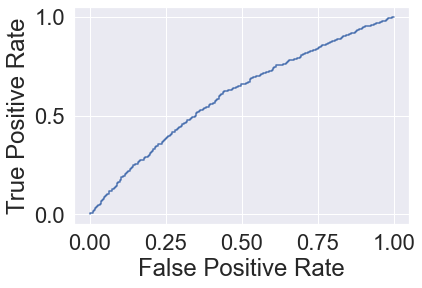

In [131]:
y_pred_proba_xgb_eth = best_xgb_eth.predict_proba(X_test)[:,1]
fpr_xgb_eth, tpr_xgb_eth, thr_xgb_eth = metrics.roc_curve(y_test,  y_pred_proba_xgb_eth)

plt.plot(fpr_xgb_eth,tpr_xgb_eth)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [132]:
metrics.roc_auc_score(y_test, y_pred_proba_xgb_eth)

0.6020368781826222

In [133]:
g_mean_xgb_eth = []
for tp, fp, th in zip(fpr_xgb_eth[1:], tpr_xgb_eth[1:], thr_xgb_eth[1:]):
    g_mean = np.sqrt(tp*(1-fp))
    g_mean_xgb_eth.append((th, g_mean))

Text(0, 0.5, 'gmean_xgb_eth')

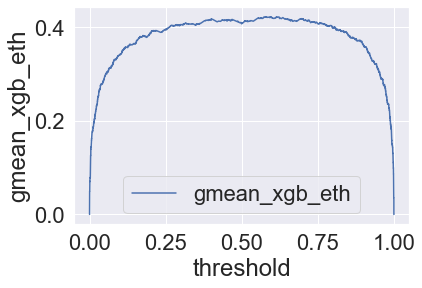

In [134]:
g_mean_xgb_eth = pd.DataFrame(g_mean_xgb_eth, columns=["threshold", "gmean_xgb_eth"])
g_mean_xgb_eth.plot(x='threshold', y='gmean_xgb_eth')
plt.xlabel("threshold")
plt.ylabel("gmean_xgb_eth")

In [135]:
best_xgb_threshold_eth = g_mean_xgb_eth.loc[g_mean_xgb_eth["gmean_xgb_eth"].argmax(), 'threshold']

In [136]:
y_pred_xgb_boolean_eth = y_pred_proba_xgb_eth > best_xgb_threshold_eth

<AxesSubplot:>

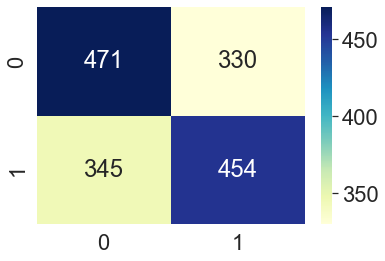

In [148]:
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_boolean_eth), cmap="YlGnBu", annot=True, fmt="d")

In [142]:
from sklearn.metrics import recall_score

for threshold in np.arange(0.1, 0.9, 0.1):
    print(f'Recall Score at thresh {threshold}: {recall_score(y_test, (y_pred_proba_xgb_eth > threshold)*1)}')


Recall Score at thresh 0.1: 0.8448060075093867
Recall Score at thresh 0.2: 0.7684605757196495
Recall Score at thresh 0.30000000000000004: 0.7108886107634543
Recall Score at thresh 0.4: 0.6620775969962454
Recall Score at thresh 0.5: 0.623279098873592
Recall Score at thresh 0.6: 0.5569461827284106
Recall Score at thresh 0.7000000000000001: 0.493116395494368
Recall Score at thresh 0.8: 0.4117647058823529


In [147]:
from sklearn.metrics import f1_score

for threshold in np.arange(0.1, 0.9, 0.1):
    print(f'F1 Score at thresh {threshold}: {f1_score(y_test, (y_pred_proba_xgb_eth > threshold)*1)}')

F1 Score at thresh 0.1: 0.6490384615384616
F1 Score at thresh 0.2: 0.6359399274987053
F1 Score at thresh 0.30000000000000004: 0.6234906695938529
F1 Score at thresh 0.4: 0.6080459770114943
F1 Score at thresh 0.5: 0.6036363636363636
F1 Score at thresh 0.6: 0.5697823303457107
F1 Score at thresh 0.7000000000000001: 0.5367847411444141
F1 Score at thresh 0.8: 0.48958333333333337


In [141]:
f1_score(y_test, y_pred_xgb_eth)

0.6036363636363636